## Scaler dataframe for Auger Open Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Actual Open Data File (http://labauger.ct.infn.it/opendata/data.php)

- Data from jan 2006 to dec 2020

In [2]:
scaler = pd.read_csv('scaler.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'scaler.csv'

In [3]:
scaler.head()

,time,rateCorr,arrayFraction,rateUncorr,pressure
0,1112215950,188.931,100.0,1922.19,855.256
1,1112216850,188.827,100.0,1920.91,855.290
2,1112217750,188.883,100.0,1921.05,855.350
3,1112218650,188.940,100.0,1921.08,855.429
4,1112219550,188.841,100.0,1919.44,855.522


In [4]:
scaler.shape

(463915, 5)

<AxesSubplot:>

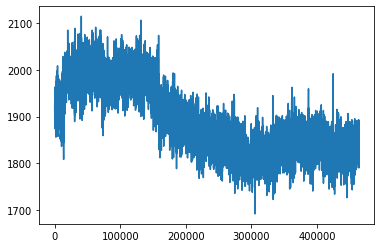

In [5]:
scaler["rateUncorr"].plot()

<AxesSubplot:>

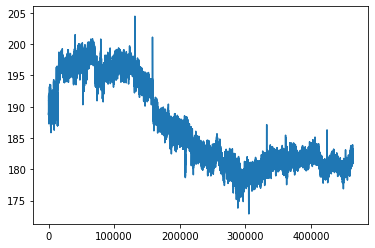

In [6]:
scaler["rateCorr"].plot()


<img src="ises-solar-cycle-f107cm.png" alt="drawing" width="450"/>

### Corrected Data With 'ScalerAnalysis'

- Data from jan 2006 to dec 2020

In [2]:
from augerscalerpy.scaler_clear import plotscaler ## ESTA SÍ ESSSSS LA FORMAAAAAAAAAAA!!!!!!!!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Hay  (11805, 4) líneas vacías


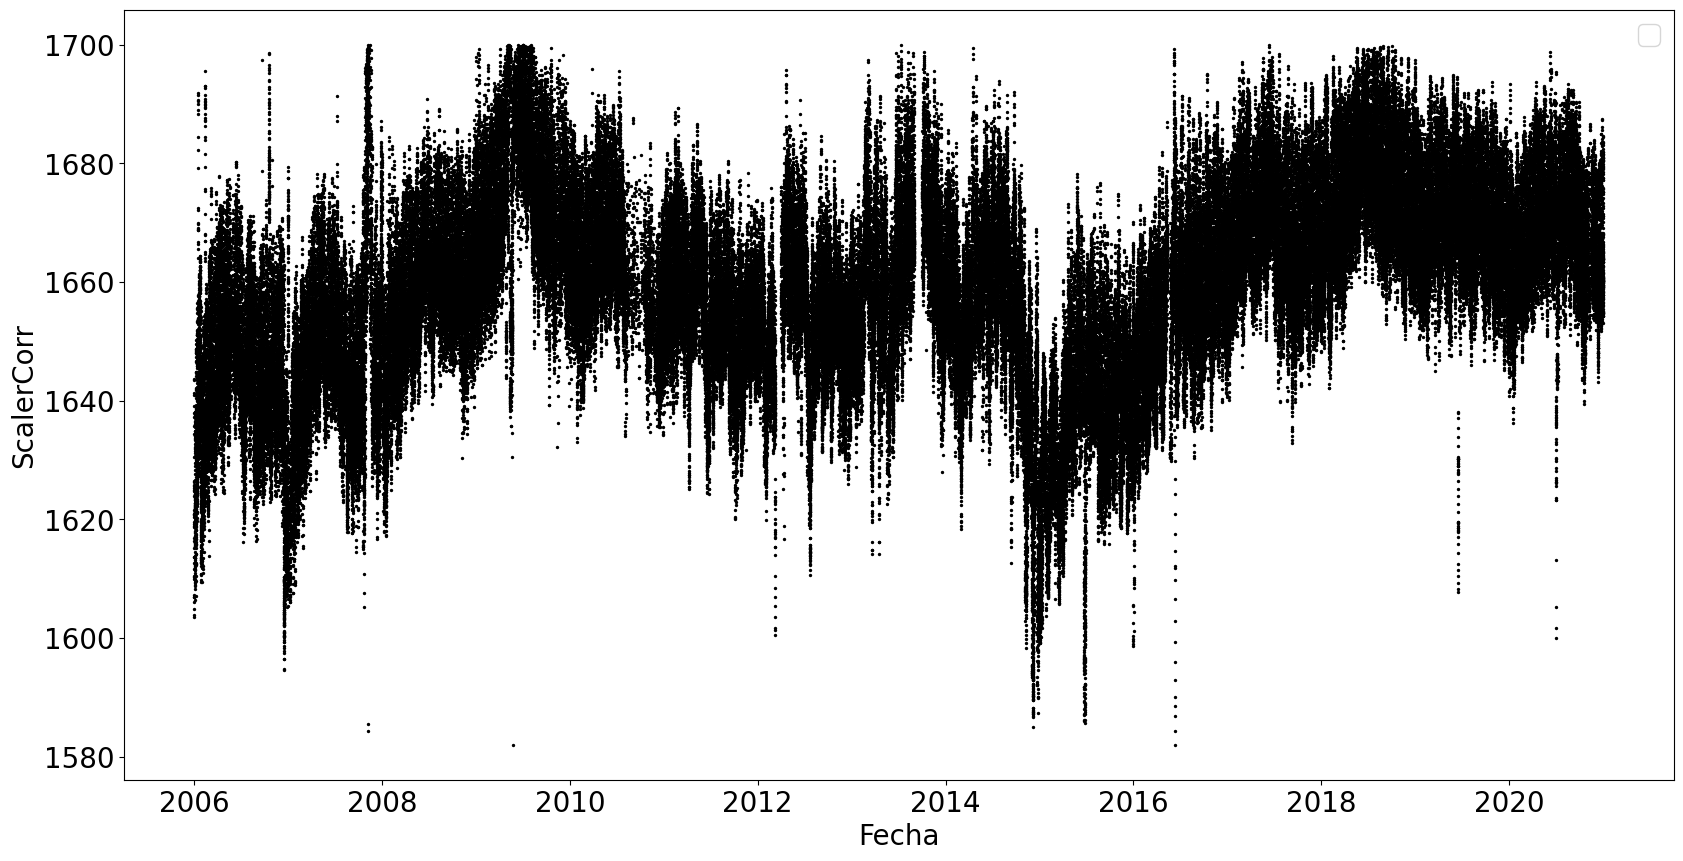

In [3]:
scalerC = plotscaler('scaler_ALL_hourly_11abril.csv','scaler_hourly')

# Validation - Searching Forbush

In [13]:
# Mi dataset se llama 'nocero'

- Forbush del 14 de Agosto del 2012, amplitud de 6.4% generado por un CME del 12.07.2012

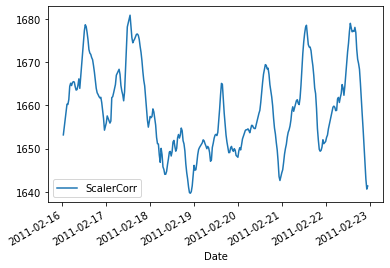

In [14]:
eventoFDU = scalerC[scalerC['Date'] >= "2011-02-16" ]
eventoFDD = eventoFDU[eventoFDU['Date'] <= "2011-02-23" ]
eventoFDD.plot(x='Date',y='ScalerCorr')
plt.show()

- Forbush del 18 de Febrero del 2011, amplitud de 5.6% generado por un CME del 15.02.2011

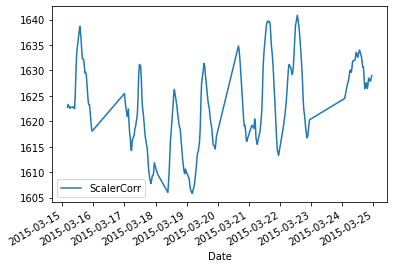

In [15]:
eventoFDU = scalerC[scalerC['Date'] >= "2015-03-15" ]
eventoFDD = eventoFDU[eventoFDU['Date'] <= "2015- 03-25" ]
eventoFDD.plot(x='Date',y='ScalerCorr')
plt.show()

- Forbush del 17 de Marzo del 2015, amplitud de 5.6%

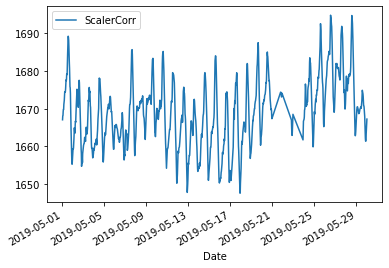

In [16]:
eventoFDU = scalerC[scalerC['Date'] >= "2019-05-01" ]
eventoFDD = eventoFDU[eventoFDU['Date'] <= "2019- 05-30" ]
eventoFDD.plot(x='Date',y='ScalerCorr')
plt.show()

# Detailed Dataset

In [18]:
detail = pd.read_csv('scaler_ALL_hourly_11abril.csv')

In [19]:
detail.head()

,Date,ScalerCorr,pressure,activeSD
0,820195200,1482.110,861.807,429.50
1,820197000,675.587,862.239,158.25
2,820198800,0.000,862.660,0.00
3,820200600,0.000,863.080,0.00
4,820202400,0.000,863.506,0.00


In [20]:
detail.shape

(253143, 4)

In [21]:
sco = detail.sort_values(by=['Date'])


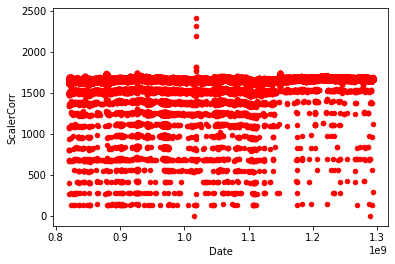

In [24]:
noc = sco[sco['ScalerCorr'] != 0 ]
noc.plot(kind='scatter',x='Date',y='ScalerCorr',color='red')
plt.show()

In [26]:
EMPTY =sco[sco['ScalerCorr'] == 0 ]
EMPTY.shape

(11805, 4)

In [27]:
STRANGE =sco[sco['ScalerCorr'] < 1400 ]
STRANGE.shape

(18410, 4)

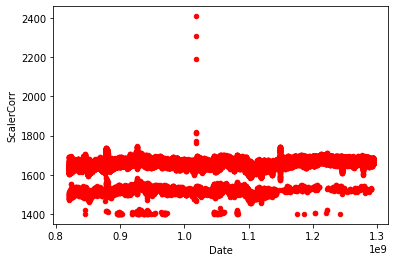

In [28]:
SDOK = sco[sco['ScalerCorr'] > 1400 ]
SDOK.plot(kind='scatter',x='Date',y='ScalerCorr',color='red')
plt.show()

In [29]:
scalerdate =SDOK.assign(Group=315964786)
scalerdate.shape

(234539, 5)

In [30]:
fixed2=  scalerdate["Date"]+scalerdate["Group"]
fixed2.head()

1363    1136073586
1364    1136075386
1365    1136077186
1366    1136078986
1367    1136080786
dtype: int64

In [31]:
SDdatetime = pd.to_datetime(fixed2, unit = 's')

In [32]:
SDOK["Date"] = SDdatetime.values

<ipython-input-32-ff7deb02544a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDOK["Date"] = SDdatetime.values


In [33]:
SDOK.head()

,Date,ScalerCorr,pressure,activeSD
1363,2005-12-31 23:59:46,1469.96,858.148,547.833
1364,2006-01-01 00:29:46,1603.57,858.762,544.333
1365,2006-01-01 00:59:46,1603.88,859.376,549.250
1366,2006-01-01 01:29:46,1604.98,859.990,554.083
1367,2006-01-01 01:59:46,1606.05,860.604,558.083


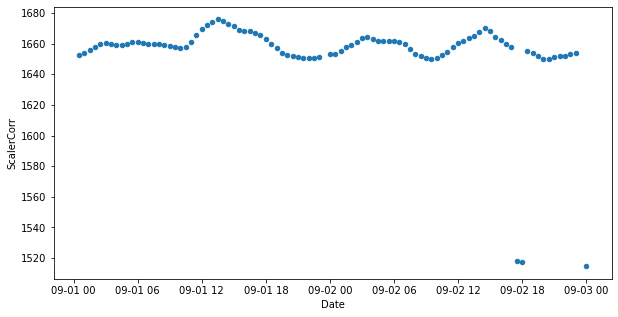

In [35]:
eventoFDU = SDOK[SDOK['Date'] >= "2008 -09-01" ]
eventoFDD = eventoFDU[eventoFDU['Date'] <= "2008 - 09-03" ]
eventoFDD.plot(kind= 'scatter',x='Date',y='ScalerCorr', figsize=(10,5))
plt.show()

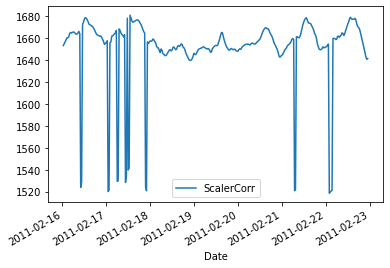

In [36]:
eventoFDU = SDOK[SDOK['Date'] >= "2011-02-16" ]
eventoFDD = eventoFDU[eventoFDU['Date'] <= "2011-02-23" ]
eventoFDD.plot(x='Date',y='ScalerCorr')
plt.show()

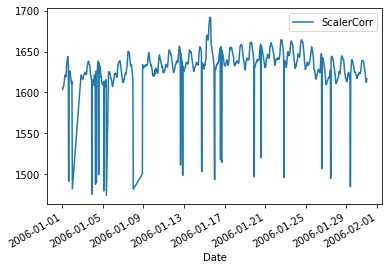

In [37]:
eventoFDU = SDOK[SDOK['Date'] >= "2006-01-01" ]
eventoFDD = eventoFDU[eventoFDU['Date'] <= "2006-01-31" ]
eventoFDD.plot(x='Date',y='ScalerCorr')
plt.show()

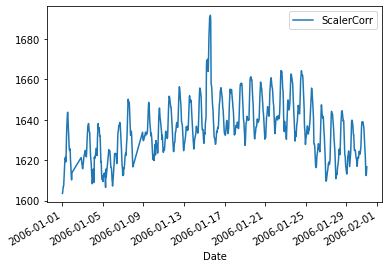

In [38]:
eventoFDU = nocero[nocero['Date'] >= "2006-01-01" ]
eventoFDD = eventoFDU[eventoFDU['Date'] <= "2006-01-31" ]
eventoFDD.plot(x='Date',y='ScalerCorr')
plt.show()

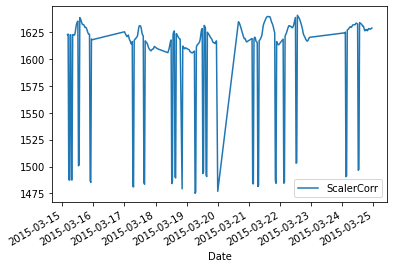

In [40]:
eventoFDU = SDOK[SDOK['Date'] >= "2015-03-15" ]
eventoFDD = eventoFDU[eventoFDU['Date'] <= "2015- 03-25" ]
eventoFDD.plot(x='Date',y='ScalerCorr')
plt.show()